# Module 2 Project - King County Housing Data


* Student name: Ryan Snow
* Student pace: Part time 
* Scheduled project review date/time: 6/15/2020 13:30
* Instructor name: Eli Thomas
* Blog post URL:


## Table of Contents
#### Data Science Workflow
An introduction and summary of the approach I took to complete this project
#### Key Business Questions
Key question asked about the dataset  
Behavioral questions  
Trend questions  
#### Obtaining The Data
Sourcing the data
#### Scrubbing The Data
Cleaning up mis-labeled values  
Detecting potential skews  
Investigating possible multicollinearity  
Removing columns that are not useful for my investigation  
Converting columns to appropriate datatypes to be modeled  
#### Exploring The Data
Use basic plots to visually examine relationships within the dataset  
Exploration and familiarization with the dataset through statistical analysis  
#### Modeling The Data
Model the normalized data and observe trends  
Train and test split  
Create a properly trained model  
#### Interpreting The Data
Observe how a properly trained model can visually explain relationships  
#### Conclusion
Final predictive model  
Conclusions regarding my questions  
Potential future work  

## Data Science Workflow
##### For this project I am going to use the OSEMiN process
##### (Obtain, Scrub, Explore, Model, Interpret) 

- **Obtain** - This part was simple for this project, our dataset was the provided KC_house_data from Kaggle.com
- **Scrub** - The objective here is to identify errors, missing or corrupted fields in the data, and to clean up the dataset by discarding, replacing, or filling missing values and errors. 
- **Explore** - This is largely what EDA is. The goal in this phase is to understand patterns within our dataset by visualizing and testing to examine relationships in the data. 
- **Model** - The "fun" part! If we've done the prior steps properly, we're ready to train a model to be able to give us some accurate predictive power to make intelligent business decisions. There may be multiple steps of evaluation and refining of the model to ensure it's accurate and unbiased as possible. 
- **Interpret** - In the final step, we examine our findings developed by our predictive modeling and indentify important business insights. Clear visualizations are paramount in this phase to be able to effectively convey our conclusion to non-technical stakeholders. As more data becomes available, this cycle can repeat and continue in a loop to build a bigger, better, and more accurate model.
 
Below you can follow the different stages of the EDA and modeling process by scrolling to the respective title

## Key Business Questions
#### Background
In this project, I assumed the role of a data scientist in a startup realty company created to help prospective sellers offload their homes for the best possible price. For the purposes of this analysis, I will mainly be focusing on livable square footage, lot square footage, number of bedrooms and bathrooms, overall home grade, and zipcode. With those variables, I will be able to predict the market value of a home within King County, Washington and allow clients to maximize their profits. 

#### Key 

## Obtain the Data
For this project, we were supplied the King County, Washington dataset from Kaggle to explore regression models related to house sales. Also included in this step will be the importing of any libraries I'll need throughout all the steps of my analysis.


In [1]:
# import the libraries I need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import math
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols


In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Explaining the Columns
We have a pretty thorough dataset explaining many traits of the 21,613 homes sold in King County, Washington in 2014-2015.

- **id** - A unique identifying value for each house
- **date** - Date house was sold
- **price** - Price house sold for - prediction target
- **bedrooms** - Number of Bedrooms
- **bathrooms** - Number of bathrooms 
- **sqft_living** - Square footage of the home
- **sqft_lot** - Square footage of the lot
- **floors** - Total floors in house
- **waterfront** - House which has a view to a waterfront(1:yes, 2:no)
- **view** - Has been viewed
- **condition** - Overall condition of the house
- **grade** - Overall grade given to the house, based on King County grading system
- **sqft_above** - Square footage of house sans basement
- **sqft_basement** - Square footage of the basement
- **yr_built** - Year the house was built
- **yr_renovated** - Year the house was renovated
- **zipcode** - Zipcode
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - Living room area in 2015 (implies renovations)
- **sqft_lot15** - Lot size area in 2015 (implies renovations)

## Scrub the Data
Now that my data has been imported, the focus will shift to preprocessing the data to be able to give us some accurate models. This includes but not limited to identifying the removing nulls, appropriately dealing with outliers, normalizing the data, and accounting for missing or improperly entered data.

In [3]:
# dataset is 21,597 rows of houses with 21 columns of descriptive data
data.shape

(21597, 21)

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# date of sale and sqft_basement are objects and not stored as numerical values(int/float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
# Mostly populated. Will explore waterfront and view more to examine how those values are stored.
# yr_renovated could be missing values as not all homes have been renovated
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# look at number of bedroom counts
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [8]:
xyz = data[data['bedrooms'] == 33]

In [9]:
# this instance looks like a double tap on data entry. It's not plausible for a house of that square footage 
# to have 33 bedrooms. I'm going to change it to 3 to remove it as an outlier. 
xyz

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [10]:
print(data.iat[15856, 3])

33


In [11]:
data.iat[15856, 3] = 3
print(data.iat[15856, 3])

3


In [12]:
# check to make sure my change worked. Now to look into the 11 and 10s to see if they're data entry errors or real
data['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [13]:
poss_error = data[data['bedrooms'] == 10]
poss_error
# seems like these could be real, will keep in dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


In [14]:
poss_error1 = data[data['bedrooms'] == 11]
poss_error1
# keeping this data as well, earlier built homes tend to have more bedrooms so it's possible

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.0,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.556,-122.363,1420,4960


In [15]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [16]:
# next I'll look at the waterfront values and examine and clean those up
data['waterfront'].unique()
# It looks like data is stored here as 0 for non-waterfront lot, 1 for waterfront lot, and 2376 missed entries as NaN

array([nan,  0.,  1.])

In [17]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [18]:
waterfront_errors = data[data['waterfront'] != 0]
waterfront_errors

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,0.0,...,9,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,0.0,...,8,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,2.0,...,9,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,0.0,...,6,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,...,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731


In [19]:
missed_wf_data = waterfront_errors[waterfront_errors['waterfront'] != 1.0]
missed_wf_data
# Here's all the houses with missing waterfront data. I'm opting to loop through these 
# instances and probabilistically assign them either a 0 or 1 based off the relative
# probability of their occurances throughout the rest of the dataset. 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,0.0,...,9,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
55,9822700295,5/12/2014,885000.0,4,2.50,2830,5000,2.0,NaN,0.0,...,9,2830,0.0,1995,0.0,98105,47.6597,-122.290,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,0.0,...,8,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,2.0,...,9,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,0.0,...,6,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,...,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731


In [20]:
rel_prob = [.992404, .007596] #calculated the prob of the waterfront location
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_wf(value): # loops through and assigns a waterfront value for the NaN placeholders probabilistically(not a word..?)
    while value not in [0,1]:
        return np.random.choice(['0.0','1.0'], p=prob) 
    else:
        return value
data.waterfront = data.waterfront.map(lambda x: impute_wf(x))
data.waterfront.value_counts(normalize=True)

0.0    0.883225
0.0    0.109274
1.0    0.006760
1.0    0.000741
Name: waterfront, dtype: float64

In [21]:
data['waterfront'].value_counts()

0.0    19075
0.0     2360
1.0      146
1.0       16
Name: waterfront, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.5+ MB


In [23]:
data.waterfront = pd.to_numeric(data.waterfront)

In [24]:
data.info()
# converted waterfront to numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [25]:
data.waterfront.value_counts()
# all checks out. Onto the next. 

0.0    21435
1.0      162
Name: waterfront, dtype: int64

In [26]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [27]:
#opting to drop year renovated as I won't be doing any modeling off of that data. 
del data['yr_renovated']

In [28]:
data.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [29]:
data['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [30]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [31]:
# I'm choosing to loop through the view values that are missing and to replace them
# with a probibalistically assigned value 

In [32]:
rel_prob = [.901923, .015325, .044441, .023591, .014721] #calculated the prob of the view rating
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_view(value): # loops through and assigns a view value for the NaN placeholders probabilistically(probably not a word)
    while value not in [0,1,2,3,4]:
        return np.random.choice([0, 1, 2, 3, 4], p=prob) 
    else:
        return value
data.view = data.view.map(lambda x: impute_view(x))
data.view.value_counts(normalize=True)

0.0    0.902023
2.0    0.044358
3.0    0.023568
1.0    0.015326
4.0    0.014724
Name: view, dtype: float64

In [33]:
data.view.value_counts()
# confirmed it worked

0.0    19481
2.0      958
3.0      509
1.0      331
4.0      318
Name: view, dtype: int64

In [34]:
data.isnull().sum()
# All missing values are now dealt with.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [35]:
# convert date to datetime
data.date = pd.to_datetime(data.date)

In [36]:
data.sqft_basement.value_counts()[:15]

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
Name: sqft_basement, dtype: int64

In [37]:
# There are 454 entries where the basement squarefootage is "?"
# I'm going to replace the "?" with 0.0 

In [38]:
data.sqft_basement = data.sqft_basement.map(lambda x: "0" if x == "?" else x)
data.sqft_basement = data.sqft_basement.astype('float')

In [39]:
# all our columns are now the appropriate datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 3.3 MB


In [40]:
# removing unnecessary columns using the drop function
def drop_cols(columns, data):
    
    return data.drop(columns, axis=1, inplace=True)

drop_cols(['sqft_living15', 'sqft_lot15', 'sqft_above', 'sqft_basement', 'yr_built'], data)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,98178,47.5112,-122.257
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045


## Explore the Data
In this step I'll use some very basic visualizations to check if I've got any holes in the dataset. 
The border between scrubbing and exploration is blurry at best, due to some of the things one may uncover whilst exploring. I'll be keeping a sharp eye out for more missing data, improperly entered data, or zeros where there shouldn't be. 
I will further look into the dataset using visualizations and statistical analysis to gain a higher understanding of the distribution, possible multicollinearity, and other preparatory tasks to ensure I will be able to train a reliable model with the dataset.

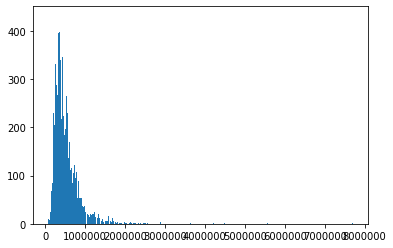

In [41]:
plt.hist(data.price, bins=1000);

In [42]:
# checking for missing price values which would skew my data
missed_price = data[data['price'] == 0]
missed_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long


In [43]:
data.loc[data.price == 0.0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long


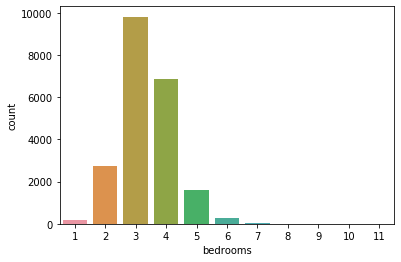

In [44]:
# simple countplot showing bedroom counts, no instances of 0 so it looks good
sns.countplot(data.bedrooms);

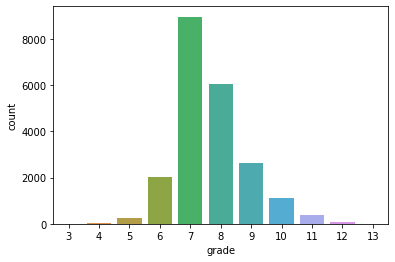

In [45]:
# also looks good. almost normal distribution. 
sns.countplot(data.grade);

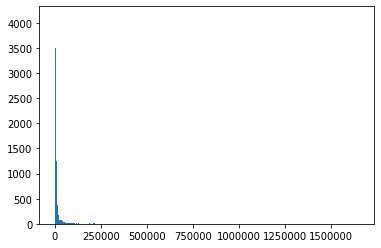

In [46]:
# looks suspect. Seems like there could be missed entries. 
plt.hist(data.sqft_lot, bins=1000);

In [47]:
lot_size_exam = data.sqft_lot.sort_values()
lot_size_exam.head(20)
# turns out there are not any missed entries and the heavy skew towards 0 is likely due to a high amount
# of houses on small lots 

15729    520
5821     572
7582     600
3449     609
20588    635
21536    638
547      649
4348     649
19646    651
21503    675
7206     676
21365    681
20079    683
15655    690
20978    690
20728    696
21121    698
10600    700
17996    704
20715    705
Name: sqft_lot, dtype: int64

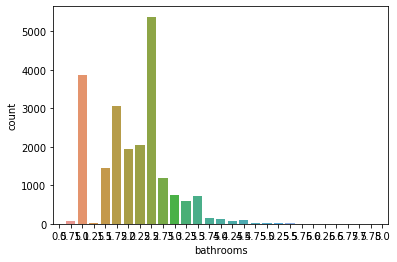

In [48]:
sns.countplot(data.bathrooms);
# no missing values here

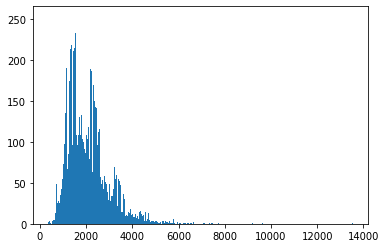

In [49]:
plt.hist(data.sqft_living, bins=1000);
# no missing values

In [51]:
# looking at some numerical info about some variables i'm curious about.
data[["price","bedrooms","bathrooms","sqft_living","sqft_lot","grade", "condition"]].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,condition
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,7.657915,3.409825
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,1.173200,0.650546
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,3.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,7.000000,3.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,7.000000,3.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,8.000000,4.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,13.000000,5.000000


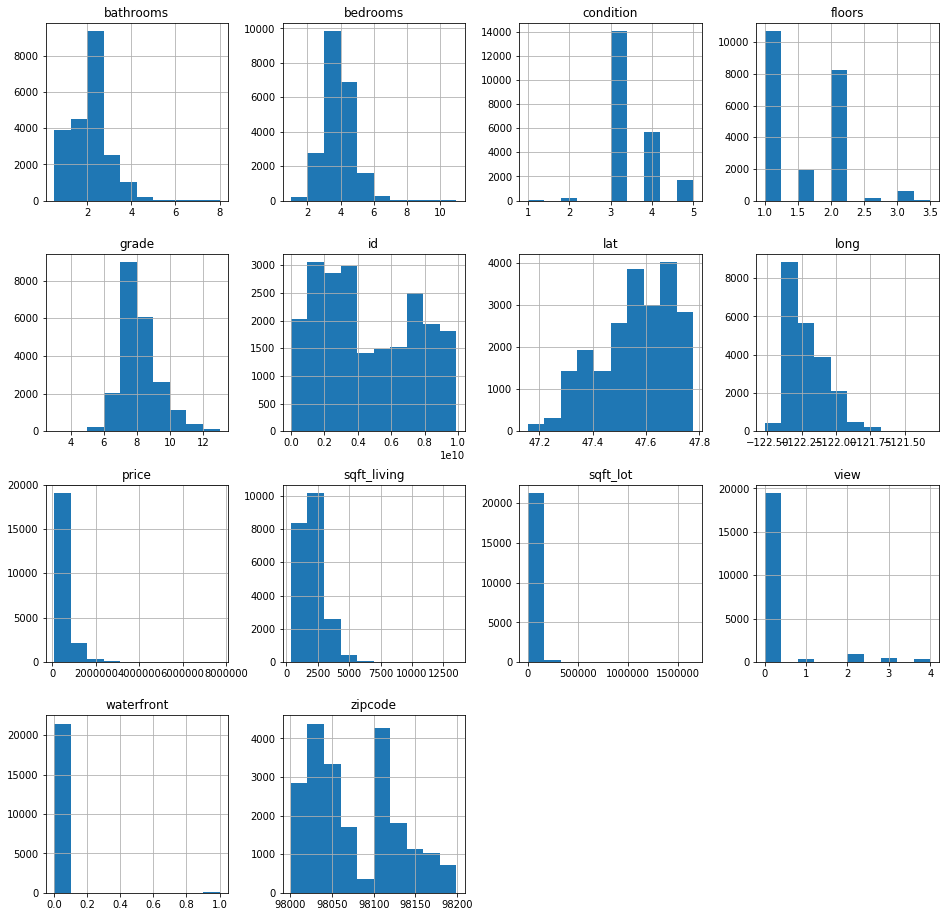

In [52]:
data.hist(figsize=(16,16));

### Transforming the Data

It appears that almost none of our columns are distributed normally. 
Over the next few cells, I'll be using a few methods to to transform our data to give us a more normal distribution. 

I'm going to be focusing on Bedrooms, bathrooms, sqft_living, sqft_lot, and Grade as the key variables affecting price so those will be the main variables I'll be normalizing. 

In [53]:
# Bedrooms first - I will beging by removing outliers
data.drop(data.index[data['bedrooms'] >= 8], inplace=True)

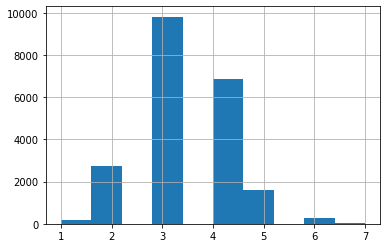

In [54]:
data.bedrooms.hist();

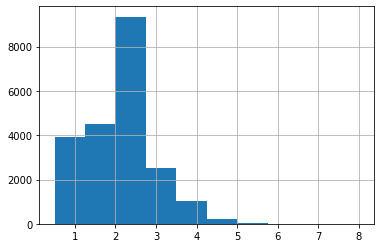

In [55]:
# Bathrooms next.
data.bathrooms.hist();

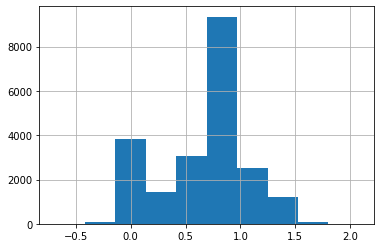

In [56]:
# there seems to be a negative skew on the BA data, so I'll log transform the data

data['bathroom_log'] = np.log(data.bathrooms)
data.bathroom_log.hist();

In [57]:
# the column now appears to be a more normal distribution
data.bathrooms = np.log(data.bathrooms)

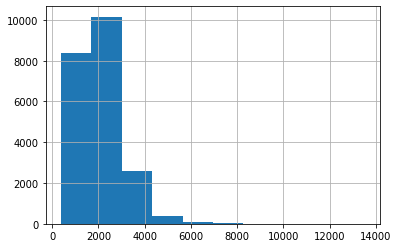

In [58]:
# sqft_living next.
data.sqft_living.hist();

In [59]:
# there seem to be some outliers along the high end.
# I'll remove the homes above 4500 sqft of living space
print(len(data[data['sqft_living'] > 4500]))

364


In [60]:
# remove outliers
data.drop(data.index[data['sqft_living'] > 4500], inplace=True)

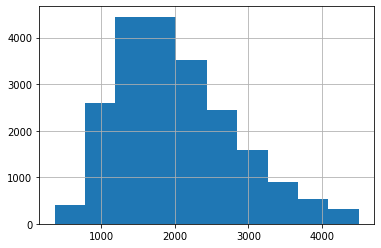

In [61]:
# hist after outlier removal
data.sqft_living.hist();

In [62]:
# will use a sqrt transformation
#(np.sqrt(data.sqft_living)).hist();

In [63]:
# commit this change
data['sqft_living_sqrt'] = np.sqrt(data.sqft_living)

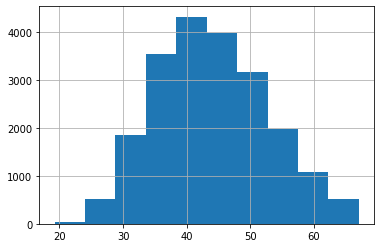

In [74]:
# sqft_lot next.
data.sqft_living_sqrt.hist();

In [65]:
# looking at how many outliers
len(data[data.sqft_lot > 200000])

233

In [66]:
data.drop(data.index[data['sqft_lot'] > 200000], inplace=True)

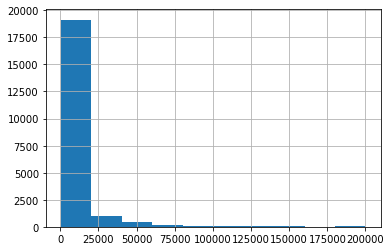

In [67]:
data.sqft_lot.hist();

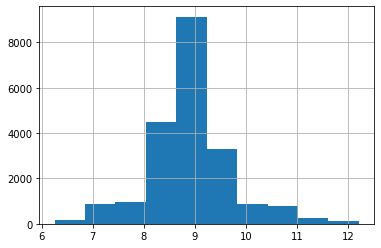

In [69]:
# now to log transform to achieve a more normal distribution
data['sqft_lot_log'] = np.log(data.sqft_lot)
data.sqft_lot_log.hist();

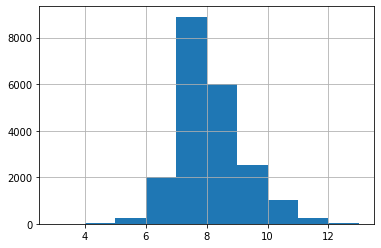

In [70]:
# grade seems to be following a normal enough distribution to not have to transform it
data.grade.hist();

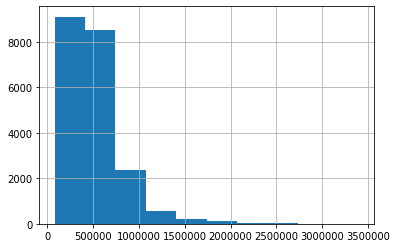

In [71]:
# Finally, price
data.price.hist();

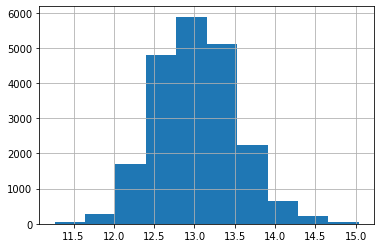

In [72]:
# log transform price
data['price_log'] = np.log(data.price)
data.price_log.hist();

In [73]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,bathroom_log,sqft_living_sqrt,sqft_lot_log,price_log
0,7129300520,2014-10-13,221900.0,3,0.000000,1180,5650,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,0.000000,34.351128,8.639411,12.309982
1,6414100192,2014-12-09,538000.0,3,0.810930,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,0.810930,50.695167,8.887653,13.195614
2,5631500400,2015-02-25,180000.0,2,0.000000,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,0.000000,27.748874,9.210340,12.100712
3,2487200875,2014-12-09,604000.0,4,1.098612,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,1.098612,44.271887,8.517193,13.311329
4,1954400510,2015-02-18,510000.0,3,0.693147,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,0.693147,40.987803,8.997147,13.142166


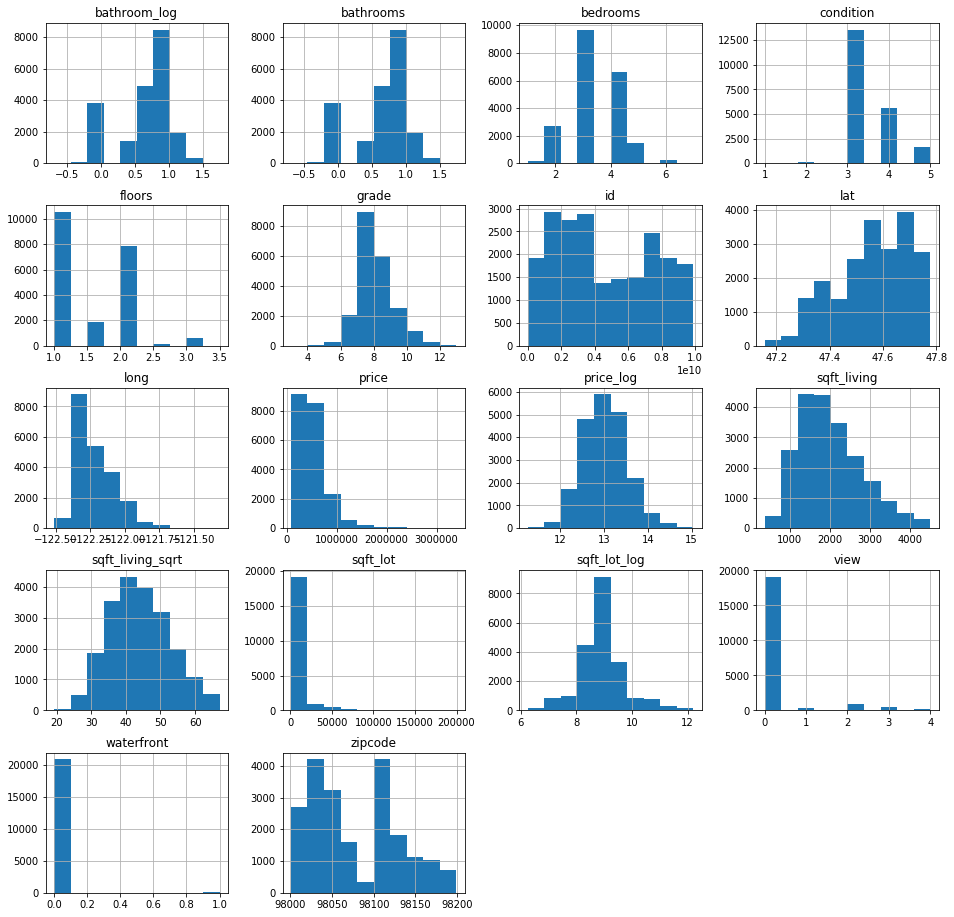

In [76]:
data.hist(figsize=(16,16));

In [77]:
# un-do the log transformation on the original bathrooms column
data['bathrooms'] = np.exp(data.bathrooms)

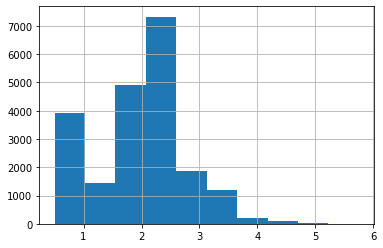

In [79]:
data.bathrooms.hist();

### Correlation 
Next, we'll look at some correlation through jointplots, spearman correlation, and p-value.

### Multicollinearity
Finally, I'll look into the possibility of multicollinearity. That will then help me in deciding which columns will be the most important to look at. 

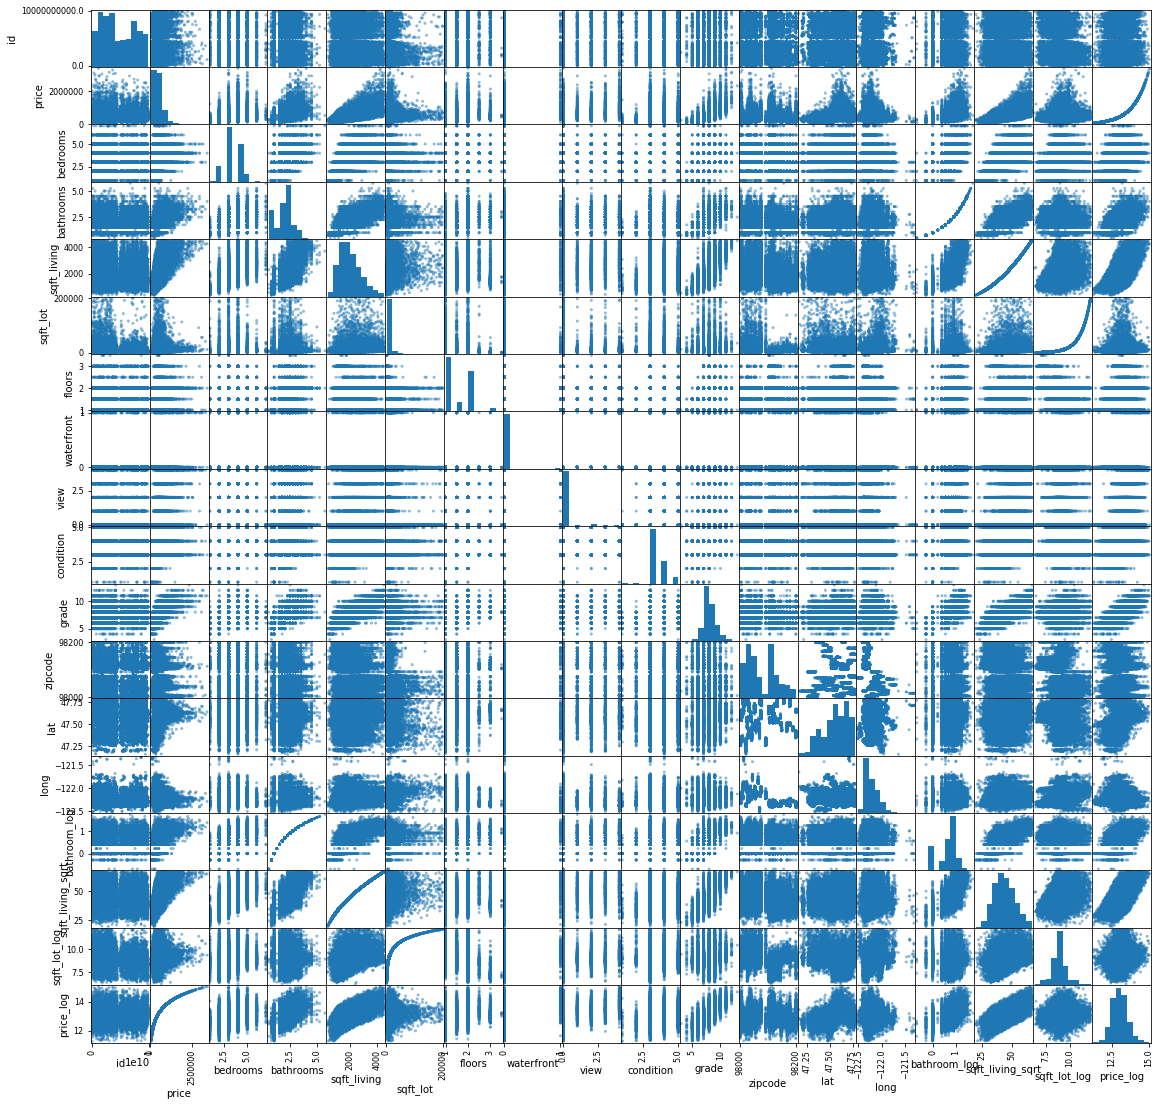

In [80]:
pd.plotting.scatter_matrix(data, figsize=[19,19])
plt.show()

The table above is pretty hard to read, so I'm going to repeat below with a boolean output. 


In [81]:
mc_data = data.copy(deep=True)
mc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,bathroom_log,sqft_living_sqrt,sqft_lot_log,price_log
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,0.000000,34.351128,8.639411,12.309982
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,0.810930,50.695167,8.887653,13.195614
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,0.000000,27.748874,9.210340,12.100712
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,1.098612,44.271887,8.517193,13.311329
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,0.693147,40.987803,8.997147,13.142166


In [92]:
abs(mc_data.loc[:, 'price':'long'].corr())>0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long
price,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False


The above table shows that no features correlate with eachother greater than 0.75.

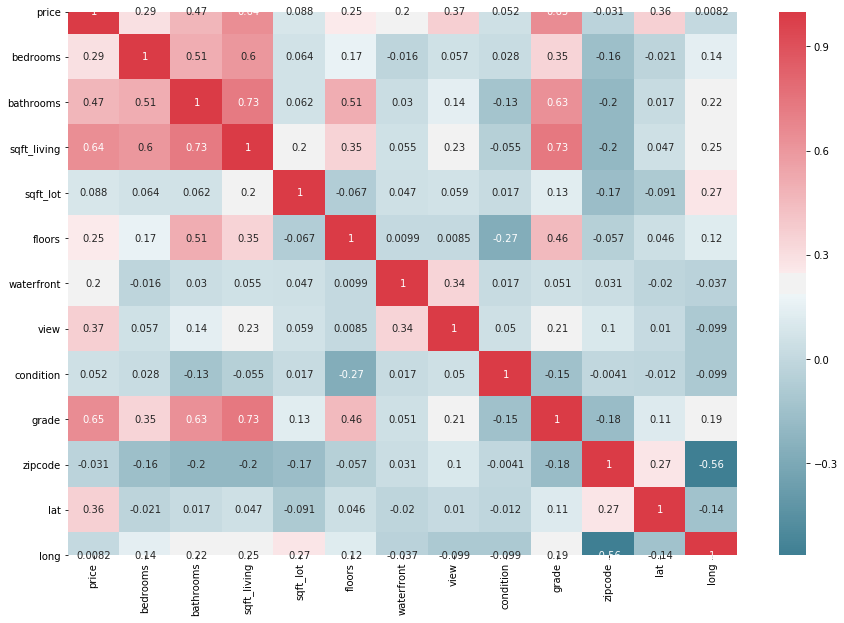

In [94]:
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data.loc[:, 'price':'long'])

By looking at the same correlation table with a heatmap, we can see that there are some correlations above .70. Namely, sqft_living correlates with bathrooms, and grade at a moderate level. 

In [96]:
# create a new df for modeling
model_data = data[['price_log', 'grade', 'bathroom_log', 'sqft_living_sqrt', 'sqft_lot_log']].copy()
model_data.head()

,price_log,grade,bathroom_log,sqft_living_sqrt,sqft_lot_log
0,12.309982,7,0.000000,34.351128,8.639411
1,13.195614,7,0.810930,50.695167,8.887653
2,12.100712,6,0.000000,27.748874,9.210340
3,13.311329,7,1.098612,44.271887,8.517193
4,13.142166,8,0.693147,40.987803,8.997147


### Zipcode
I'm going to look into the Zipcode column to see which zipcodes are representative of expensive neighborhoods, and which ones are representative of more affordable neighborhoods. This information will help us know where to start when a client contracts us to help sell their home. 

In [100]:
zip_data = data.copy()

In [104]:
pd.set_option('display.max_rows', 100)

In [114]:
zip_data['price'] = zip_data['price'].fillna(0.0).astype(int)

In [119]:
zip_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,bathroom_log,sqft_living_sqrt,sqft_lot_log,price_log
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,0.000000,34.351128,8.639411,12.309982
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,0.810930,50.695167,8.887653,13.195614
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,0.000000,27.748874,9.210340,12.100712
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,1.098612,44.271887,8.517193,13.311329
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,0.693147,40.987803,8.997147,13.142166


In [124]:
zip_data.iloc[0,2]

221900

In [130]:
zip_data['price'] = zip_data['price'].round(7)

In [131]:
zip_data['price'].describe()

count    2.097700e+04
mean     5.167992e+05
std      3.002047e+05
min      7.800000e+04
25%      3.199500e+05
50%      4.450000e+05
75%      6.280000e+05
max      3.400000e+06
Name: price, dtype: float64

In [138]:
zip_data['zipcode'].value_counts()

98103    601
98115    582
98052    571
98038    566
98117    552
98042    537
98034    537
98118    504
98023    496
98133    492
98059    453
98006    450
98058    445
98155    443
98074    424
98033    416
98125    409
98056    405
98027    385
98053    368
98001    360
98126    354
98075    341
98144    335
98106    334
98116    329
98092    329
98029    316
98199    314
98065    295
98122    289
98146    288
98004    285
98028    283
98198    278
98008    278
98003    277
98031    271
98168    269
98055    267
98072    266
98107    265
98136    262
98178    261
98030    255
98040    254
98112    251
98166    249
98177    246
98105    218
98045    203
98022    203
98002    199
98011    193
98108    186
98119    182
98077    178
98019    170
98005    161
98007    140
98188    136
98032    124
98109    106
98014    101
98102     99
98070     98
98010     90
98024     58
98148     57
98039     38
Name: zipcode, dtype: int64

In [137]:
zip_data.groupby('zipcode')['price'].mean().sort_values()

zipcode
98002    2.342840e+05
98168    2.403284e+05
98032    2.489277e+05
98001    2.796149e+05
98023    2.835881e+05
98148    2.849086e+05
98188    2.890783e+05
98003    2.895637e+05
98022    2.918548e+05
98030    2.954966e+05
98198    2.974500e+05
98031    2.975754e+05
98055    3.040047e+05
98042    3.066889e+05
98178    3.087377e+05
98106    3.189813e+05
98092    3.199012e+05
98058    3.460678e+05
98108    3.556785e+05
98038    3.590065e+05
98146    3.594963e+05
98133    3.871071e+05
98014    3.955512e+05
98010    3.997455e+05
98045    4.038294e+05
98019    4.103489e+05
98155    4.113017e+05
98118    4.130274e+05
98056    4.201100e+05
98126    4.247346e+05
98024    4.325891e+05
98166    4.407144e+05
98028    4.624889e+05
98070    4.645724e+05
98125    4.699288e+05
98059    4.771084e+05
98011    4.895730e+05
98034    5.093730e+05
98065    5.124950e+05
98136    5.454776e+05
98072    5.567296e+05
98144    5.602518e+05
98027    5.748761e+05
98117    5.759595e+05
98107    5.778989e+05
98

In [140]:
# create selector supsets for each zipcode
# perhaps using a forloop to automate the creation

In [ ]:
sns.jointplot('sqft_living','price', data=df2[zip98103], size=10, alpha=.5, marker='+')

## Model the Data
Below, I'll begin deeper statistical analysis and start looking at some linear and polynomial regression. In the previous section I took care of the transformations of certain columns in order for them to follow a more normal distribution, that will allow me to build a more accurate model in this step. 

In [ ]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['grade', 'bathroom_log', 'sqft_living_sqrt', 'sqft_lot_log']):
    print ("King County, Washington - Regression Analysis and Diagnostics for formula: medv~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price_log' + val
#   
    model = smf.ols(formula=f, data=model_data).fit()
    
    X_new = pd.DataFrame({val: [data[val].min(), data[val].max()]});
    preds = model.predict(X_new)
    data.plot(kind='scatter', x=val, y='price_log');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

In [ ]:
#data.plot(kind='scatter', x='long', y='lat', alpha=.3, figsize=(20,15), c='price', cmap='viridis', 
#                sharey=True, sharex=False);

In [ ]:
f, ax = plt.subplots(figsize=(15,12))

sns.heatmap(data.corr(), center=0, linewidths=.8, cmap="YlGnBu");

In [ ]:
data.head()